# Characteristics #

Defining the various characteristics of the CarBen and Phat distributions.

## Density ##

### Phat ###
The Phat distribution density is simply s weighted average of the constituent left and right CarBens.
$$
f(x) = \sum\limits_{i=1}^nw_if_i(x)
\\f(x) = 0.5*f_{\textit{left}}(x) + 0.5*f_{\textit{right}}(x)
$$

### Right CarBen ###
The density of the CarBen is a piecewise function as detailed by [Carreau and Bengio](#references.ipynb).

$$
f_{\textit{right}}(x) = \left\{ \begin{array}{ll}
      \frac{1}{\gamma} f_{\mu,\sigma}(x) & \text{if } x\leq a \\
      \frac{1}{\gamma} g_{\xi,a,b}(x) & \text{if } x > a\\
\end{array} \right.
$$

### Left CarBen ###
When reflected to the left-side, we simply flip the valence of the $x$ and Pareto location, $a$.

$$
f_{\textit{left}}(x) = \left\{ \begin{array}{ll}
      \frac{1}{\gamma} g_{\xi,-a,b}(-x) & \text{if } x < a \\
       \frac{1}{\gamma} f_{\mu,\sigma}(x) & \text{if } x \geq a\\
\end{array} \right.
$$

## Cumulative Distribution Function ##

### Phat ###
Like the PDF, the Cumulative Distribution Function (CDF) of the Phat distribution is just the weighted average of the component CDFs.

$$
F(x) = \sum\limits_{i=1}^nw_iF_i(x)
\\f(x) = 0.5*F_{\textit{left}}(x) + 0.5*F_{\textit{right}}(x)
$$

### Right CarBen ###
The CDF of the CarBen is also piece-wise, expressed as follows for the right.

$$
F_{\textit{right}}(x) = \left\{ \begin{array}{ll}
      \frac{1}{\gamma} F_{\mu,\sigma}(x) & \text{if } x\leq a \\
      \frac{1}{\gamma} \left(F_{\mu,\sigma}(a) + G_{\xi,a,b}(x)\right) & \text{if } x > a\\
\end{array} \right.
$$

Thus, the CDF is simply the sum of the Gaussian and Pareto components.

### Left CarBen ###
The formula for the left CarBen is only slight more complicated. As with the other functions, the CDF of the left CarBen is a summation  of its components. The CDF is scaled left-to-right, so in the left instance the first component incorporated is the generalized Pareto. The Pareto tail is a reflected version of its right-tailed cousin, so the CDF of the left is equivalent to the survival function of the right. And we know the reflection is achieved by reversing the valence of $a$ and $x$.

$$
G_{\textit{left}}(x) = \frac{1}{\gamma}\left(1 - G_{\xi,-a,b}(-x)\right)
$$

And this handles the CDF up to the junction $a$. Equal to and beyond $a$, we must determine how to sum the CDF of Pareto and the Gaussian. When $x=a$, 

$$ 1 - G_{\xi,-a,b}(-a) = 1$$
and
$$G_{\textit{left}}(a) = \frac{1}{\gamma}$$

For the Gaussian, we must exclude the left-tail portion and so calculate the CDF on the interval $[a, x)$, which is equivalent to:

$$
F_{\mu,\sigma}(x) - F_{\mu,\sigma}(a)
$$

This results in:

$$
\frac{1}{\gamma}\left(1+ F_{\mu,\sigma}(x) - F_{\mu,\sigma}(a)\right)
$$

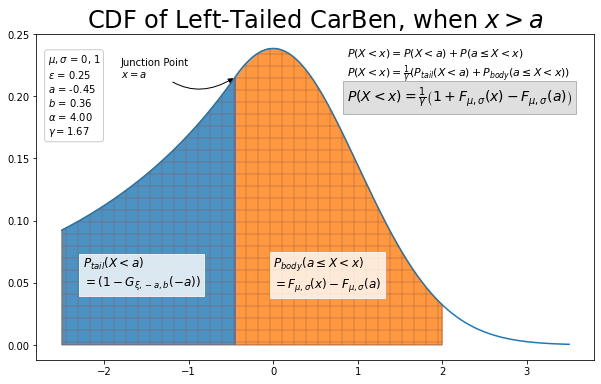

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import phat as ph

shape, mean, sig = 1/4, 0, 1
x = np.linspace(-2.5, 3.5, 1000)

dist = ph.dists.CarBenHybrid(-shape, mean, sig)

fig, ax1 = plt.subplots(1,1,figsize=(10, 6))

tailprops = dict(ls='--', lw=2, alpha=.5)
ax1.plot(x, dist.pdf(x), label='CarBen')

paramtxt = r'$\mu, \sigma$ = ' + f'{dist.mu:.0f}, {dist.sig:.0f}'
paramtxt += '\n'
paramtxt += r'$\epsilon$ = ' + f'{dist.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$a$ = ' + f'{dist.a:.2f}'
paramtxt += '\n'
paramtxt += r'$b$ = ' + f'{1 / dist.b:.2f}'
paramtxt += '\n'
paramtxt += r'$\alpha$ = ' + f'{1 / dist.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$\gamma = $' + f'{dist.gamma:.2f}'
ax1.text(
    .02,.69, paramtxt,
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)

txt = 'Junction Point\n' + r'$x = a$' 
arrowprops = dict(
    arrowstyle="-|>", connectionstyle="arc3,rad=.4", fc='black', ec='black'
)
ax1.annotate(
    txt, xy=(dist.a, dist.pdf(-dist.a)), xytext=(dist.a*4, dist.pdf(-dist.a)),
    arrowprops=arrowprops
)
plt.rcParams['hatch.linewidth'] = .5
txt = r'$P_{tail}(X<a)$'
txt += '\n'
txt += r'$= (1 - G_{\xi,-a,b}(-a))$'
ax1.text(
    dist.a*5, dist.pdf(dist.a)/3, txt, fontsize=12, ha='left', va='top',
    bbox=dict(boxstyle='square', ec='w', fc='w', alpha=.8)
)
fill1 = ax1.fill_between(
    x[x<dist.a], dist.pdf(x[x<dist.a]), 
    alpha=.8, hatch='+', ec='C5'
)

x_max = 2
txt = r'$P_{body}(a\leq X<x)$'
txt += '\n'
txt += r'$= F_{\mu,\sigma}(x) - F_{\mu,\sigma}(a)$'
ax1.text(
    0, dist.pdf(dist.a)/3, txt, fontsize=12, ha='left', va='top',
    bbox=dict(boxstyle='square', ec='w', fc='w', alpha=.8)
)
fill2 = ax1.fill_between(
    x[(x>=dist.a) & (x<=x_max)], dist.pdf(x[(x>=dist.a) & (x<=x_max)]), 
    alpha=.8, hatch='+', ec='C5'
)
txt = r'$P(X<x) = P(X<a) + P(a\leq X<x)$'
txt += '\n'
txt += r'$P(X<x) = \frac{1}{\gamma}\left(P_{tail}(X<a) + P_{body}(a\leq X<x)\right)$'
ax1.text(
    .875, dist.pdf(dist.a), txt, fontsize=11,
    bbox=dict(boxstyle='square', ec='w', fc='w', alpha=0)
)
txt = r'$P(X<x) = \frac{1}{\gamma}\left(1 + F_{\mu,\sigma}(x) - F_{\mu,\sigma}(a)\right)$'
ax1.text(
    .875, dist.pdf(dist.a)/1.1, txt, fontsize=14,
    bbox=dict(boxstyle='square', ec='black', fc='grey', alpha=.25)
)
ax1.grid(False)
ax1.set_title('CDF of Left-Tailed CarBen' + r', when $x>a$', size=24)
plt.show()

Putting the pieces together results in:

$$
F_{\textit{left}}(x) = \left\{ \begin{array}{ll}
      \frac{1}{\gamma}\left(1 - G_{\xi,-a,b}(-x)\right) & \text{if } x < a \\
      \frac{1}{\gamma}\left(1+ F_{\mu,\sigma}(x) - F_{\mu,\sigma}(a)\right) & \text{if } x \geq a\\
\end{array} \right.
$$

## Quantile Function ##

### Phat ###
Once again, the Quantile Function $Q(.)$, known in `scipy` as the percent-point function, `ppf`, for the Phat distribution is a weighted average of the CarBens.

$$
Q(x) = \sum\limits_{i=1}^nw_iQ_i(x)
\\Q(x) = 0.5*Q_{\textit{left}}(x) + 0.5*Q_{\textit{right}}(x)
$$

### Right CarBen ###
Before we derive $Q(x)$ for each CarBen, it is helpful to know the quantile of the junction point between the tail and body distributions. We know this point to be the location parameter, $a$, of the generalized Pareto. We also know the relationship between the junction point and $\gamma$. For the right CarBen,

$$
P(X>a) = \frac{1}{\gamma}
$$

Quantiles are, of course, merely the cumulative distribtion up to the given point. So the junction quantile, available via the `qjunc` method, is merely:

$$
P(X\leq a) = 1 - P(X>a) = 1 - \frac{1}{\gamma}
$$

So, for the right-tailed CarBen, first remember the definition of the Quantile function:

$$ x = Q(P(X<x)) = Q(F(x))$$

where, in this framing, we refer to $P(X\leq x)$ or $F(x)$ as the *quantile*. One important difference between the Q derivation and the PDF/CDF derivations above is that the Q function is *not* a summation of the body and tail Q functions. Q(.) identifies a *value derived specifically and solely from the distribution from which it originates*. That means, for a right-tailed CarBen, 

$$
x = \left\{ \begin{array}{ll}
    Q_{\textit{body}}(P_{\textit{body}}(X<x)) & \text{if } x < a \\
    Q_{\textit{tail}}(P_{\textit{tail}}(X<x)) & \text{if } x \geq a\\
\end{array} \right.
$$

Remember, the input to the Quantile function is a cumulative probability for the entire piecewise, hybrid CarBen. So we must conver that probability, $P(X<x)$, into $P_{\textit{body}}(X<x)$ or $P_{\textit{tail}}(X<x)$ to find the correct value.

So, for all $x$,

$$
P(X<x) = P(X\leq a) + P(a<X<x)
$$

Recall:
$$
\text{quantile, q} = P(X<x)
\\\text{qjunc}, q_a = P(X\leq a)
\\P_{tail}(X<a) = 0
$$

so, where $x\leq a$,

$$
P(X<x) = \frac{P_{\textit{body}}(X<x)}{\gamma}
\\P_{\textit{body}}(X<x) = \gamma*P(X<x) = \gamma q
$$

and where $x>a$,

$$
P(X<x) = q_a + P_{\textit{tail}}(X<x) / \gamma
\\P_{\textit{tail}}(X<x) = \gamma(P(X<x) - q_a) = \gamma(q - q_a)
$$

So, for the right-tail CarBen, the Quantile function for a given $q = P(X<x)$:

$$
x = \left\{ \begin{array}{ll}
    Q_{\textit{body}}(\gamma q) & \text{if } x \leq a \\
    Q_{\textit{tail}}(\gamma q - \gamma q_a) & \text{if } x > a\\
\end{array} \right.
$$

### Left CarBen ###

As we've seen, the left-tailed CarBen requires slight modifications to the formulas. For the `qjunc`, remember that that CDF of the left-tailed Pareto is equivalent to the Survival Function of the right-tailed, with location, $a$, reflected so:

$$P_{\textit{right}}(X>a) = \frac{1}{\gamma}$$

$$
\text{qjunc } q_a = P_{\textit{left}}(X<a) = P_{\textit{right}}(X>-a) = \frac{1}{\gamma}
$$

again available via the `qjunc` method.

For the Quantile function, we rearrange the piecewise components as follows:

$$
x = \left\{ \begin{array}{ll}
    Q_{\textit{tail}}(P_{\textit{tail}}(X<x)) & \text{if } x < a \\
    Q_{\textit{body}}(P_{\textit{body}}(X<x)) & \text{if } x \geq a\\
\end{array} \right.
$$

We want to express the target left-tailed `x` value and the Quantile function in terms of the right-tailed `x` and right Quantile function. This means:

$$
P_{\textit{left}}(X<x_{\textit{left}}) = (1 - P_{\textit{right}}(X<x_{\textit{right}}))
\\x_{\textit{left}} = -x_{\textit{right}}
$$

Beginning again with, for all $x$,

$$
P(X<x) = P(X<a) + P(a\leq X<x)
$$

so, where $x<a$,

$$
P_{\textit{left}}(X<x_{\textit{left}}) = \frac{P_{\textit{left, tail}}(X<x_{\textit{left}})}
{\gamma}
\\q = \frac{(1 - P_{\textit{right, tail}}(X<x_{\textit{right, tail}}))}
{\gamma}
\\P_{\textit{right, tail}}(X<x_{\textit{right, tail}})) = 1 - \gamma q
\\x_{\textit{right}} = Q_{\textit{right}}(.)
\\Q_{\textit{tail}}(.) = x_{\textit{left}} = -x_{\textit{right}} = -Q_{\textit{right}}(1 - \gamma q)
$$

And where $x\geq a$, first, recall in the body, 

$$P_{\textit{body}}(a\leq X<x) = P_{\textit{body}}(X<x) - P_{\textit{body}}(X\leq a) $$

We also know that,

$$
P_{\textit{body}}(X<a) = 2\gamma q_a - \gamma = \gamma(2q_a-1)
$$

So,

$$
P_{\textit{left}}(X<x_{\textit{left}}) = q_a + \frac{P_{\textit{body}}(X<x_{\textit{left}})}{\gamma} - \frac{P_{\textit{body}}(X<a)}{\gamma}
\\\gamma(q-q_a) = P_{\textit{body}}(X<x_{\textit{left}}) - P_{\textit{body}}(X<a))
\\P_{\textit{body}}(X<x_{\textit{right}}) = \gamma(q-q_a) + P_{\textit{body}}(X<a)
\\P_{\textit{body}}(X<x_{\textit{right}}) = \gamma(q-q_a) + \gamma(2q_a-1)
\\P_{\textit{body}}(X<x_{\textit{right}}) = \gamma(q-q_a + 2q_a-1)
\\P_{\textit{body}}(X<x_{\textit{right}}) = \gamma(q + q_a - 1)
$$
In the body, realize that $x_{\textit{left}} = x_{\textit{right}}$
$$
\\x_{\textit{right}} = Q_{\textit{right}}(.)
\\Q_{\textit{body}}(.) = x_{\textit{left}} = x_{\textit{right}} = Q_{\textit{body}}(\gamma(q + q_a - 1))
$$

$$
-\gamma(1-q-q_a) = \frac{-\gamma(1-q-q_a)(q-q_a)}{q - q_a} =  -\gamma + \gamma q + \gamma q_a = 
\gamma(q-q_a) + P_{\textit{body}}(X<a)
\\P_{\textit{body}}(X<a) = -\gamma + \gamma q + \gamma q_a - \gamma q + \gamma q_a
\\P_{\textit{body}}(X<a) = 2\gamma q_a - \gamma = \gamma(2q_a-1)
$$

The end results is:

$$
x = \left\{ \begin{array}{ll}
    -Q_{\textit{right, tail}}(1 - \gamma q) & \text{if } x < a \\
    Q_{\textit{body}}(\gamma q + \gamma q_a - \gamma) & \text{if } x \geq a\\
\end{array} \right.
$$

## Moments ##

Here we show how to find the moments of the Phat distribution. As we know, the Phat distribution is a mixture model of two Carben distributions, each weighted 50%. Thus, the PDF of the Phat distribution is simply:

$$
f(x) = \sum\limits_{i=1}^nw_if_i(x)
\\f(x) = 0.5*f_{\textit{left}}(x) + 0.5*f_{\textit{right}}(x)
$$

The Carben distribution has a piecewise density function, defined for a right-tail as:

$$
f_{\textit{right}}(x) = \left\{ \begin{array}{ll}
      \frac{1}{\gamma} f_{\mu,\sigma}(x) & \text{if } y\leq a \\
      \frac{1}{\gamma} g_{\xi,a,b}(x) & \text{if } y > a\\
\end{array} \right.
$$

And for the left

$$
f_{\textit{left}}(x) = \left\{ \begin{array}{ll}
      \frac{1}{\gamma} g_{\xi,-a,b}(-x) & \text{if } y < a \\
       \frac{1}{\gamma} f_{\mu,\sigma}(x) & \text{if } y \geq a\\
\end{array} \right.
$$

The MGF for a mixture model is simply the weighted average of MGF's of its components, shown as follows:

$$
M_x(n) = \int_{-\infty}^{+\infty}e^{nx}f_X(x)\delta x
\\ = \int_{-\infty}^{+\infty}e^{nx}\left(.5*f_{\textit{left}}(x) + .5*f_{\textit{right}}(x)\right)\delta x
$$

$$
\\ = \int_{-\infty}^{+\infty}.5*e^{nx}f_{\textit{left}}(x) + .5*e^{nx}f_{\textit{right}}(x)\delta x
\\ = .5\int_{-\infty}^{+\infty}e^{nx}f_{\textit{left}}(x)\delta x + .5\int_{-\infty}^{+\infty}e^{nx}f_{\textit{right}}(x)\delta x
\\ = .5*M_{left} + .5*M_{right}
$$

Thus, to find the moments of the Phat, we must find the MGFs of the component Carbens.

### Carben Right ###

The MGF of a piecewise distribution is simply the sum of the integrals along the bounded ranges.

$$
M_{right}(n) = \frac{1}{\gamma}\int_{-\infty}^{a}e^{nx}f_{\mu,\sigma}(x)\delta x + \frac{1}{\gamma}\int_{a}^{+\infty}e^{nx}g_{\xi,a,b}(x)\delta x
$$

The body term is a truncated normal distribution. The moments of such functions are known and available in `scipy`. We know that the generalized Pareto is always restricted the interval $(a,\infty)$, so the tail term is merely the MGF of generalized Pareto scaled by $\frac{1}{\gamma}$. Thus,

$$
\frac{1}{\gamma}M_{\mu,\sigma,u}(n) + \frac{1}{\gamma}M_{\xi,a,b}(n)
$$
where: $u$ is the upper bound of the body

### Carben Left ###

Now for the left:

$$
M_{left}(n) = \frac{1}{\gamma}\int_{-\infty}^{a}e^{nx}g_{\xi,-a,b}(-x)\delta x
 + \frac{1}{\gamma}\int_{a}^{+\infty}e^{nx}f_{\mu,\sigma}(x)\delta x
\\=\frac{1}{\gamma}\int_{-a}^{+\infty}e^{nx}g_{\xi,-a,b}(x)\delta x
 + \frac{1}{\gamma}\int_{a}^{+\infty}e^{nx}f_{\mu,\sigma}(x)\delta x
$$

Once again, the tail portion is the MGF of the generalized Pareto. And once again, the body portion is a truncated normal, this time with a lower bound, so the MGF is found as:

$$
\frac{1}{\gamma}M_{\xi,-a,b}(n) + \frac{1}{\gamma}M_{\mu,\sigma,l}(n)
$$
where: $l$ is the lower bound of the body

### Mean ###

The first moment is the first derivative of $M$, so:

$$
\mu_{\textit{right}} = \frac{d}{dx}\frac{1}{\gamma}M_{\mu,\sigma,u}(1) + \frac{d}{dx}\frac{1}{\gamma}M_{\xi,a,b}(1)
\\\mu_{\textit{left}} = \frac{d}{dx}\frac{1}{\gamma}M_{\xi,-a,b}(1) + \frac{d}{dx}\frac{1}{\gamma}M_{\mu,\sigma,l}(1)
$$

In both instances, the constant multiplicative survives the differentiations. For the left tail, in order to reflect its true location, $a$, we must invert the sign:
$$
\mu_{\textit{phat}} = .5*\mu_{\textit{right}} + .5*\mu_{\textit{left}}
\\\mu_{\textit{right}} = \frac{1}{\gamma}\text{Mean}_{\mu,\sigma,u} + \frac{1}{\gamma}\text{Mean}_{\xi,a,b}
\\\mu_{\textit{left}} = -\frac{1}{\gamma}\text{Mean}_{\xi,-a,b} + \frac{1}{\gamma}\text{Mean}_{\mu,\sigma,l}
$$

Finding mean of the Phat distribution programmatically is thus fairly trivial.

In [12]:
import numpy as np
import scipy.stats as scist

import phat as ph

In [13]:
phat = ph.Phat(.1, .2, .2, .25)

bmu = scist.truncnorm(
    -np.inf, 
    phat.right.a, 
    *phat.right.body.args
).mean()
tmu = phat.right.tail.mean()
rmu = (bmu + tmu) / phat.right.gamma

bmu = scist.truncnorm(
    phat.left.a,
    np.inf, 
    *phat.left.body.args
).mean()
tmu = -phat.left.tail.mean()
lmu = (bmu + tmu) / phat.left.gamma

The mean of the Phat distribution is:

In [14]:
np.mean((lmu, rmu))

0.1426574558489754

We can see the mean of the Phat in the above example is close to, but slightly higher than the mean of the Gaussian body, $\mu$. This results from the greater tail index in the right tail used in the example.

In [15]:
phat.mean()

0.1426574558489754

### Variance ###

The second moment is the second derivative of $M$, so:

$$
\text{Var}_{\textit{right}} = \frac{d^2}{dx}\frac{1}{\gamma}M_{\mu,\sigma,u}(2) + \frac{d^2}{dx}\frac{1}{\gamma}M_{\xi,a,b}(2)
\\\text{Var}_{\textit{left}} = \frac{d^2}{dx}\frac{1}{\gamma}M_{\xi,-a,b}(2) + \frac{d^2}{dx}\frac{1}{\gamma}M_{\mu,\sigma,l}(2)
\\\text{Var}_{\textit{right}} = \frac{1}{\gamma}\text{Var}_{\mu,\sigma,u} + \frac{1}{\gamma}\text{Var}_{\xi,a,b}
\\\text{Var}_{\textit{left}} = \frac{1}{\gamma}\text{Var}_{\xi,-a,b} + \frac{1}{\gamma}\text{Var}_{\mu,\sigma,l}
\\\text{Var}_{\textit{phat}} = .5*\text{Var}_{\textit{right}} + .5*\text{Var}_{\textit{left}}
$$

Note that no negative is applied to the second moment as it eliminated bystanders the square.

And so the variance of the Phat is found as:

In [16]:
bvar = scist.truncnorm(
    -np.inf, 
    phat.right.a, 
    *phat.right.body.args
).var()
tvar = phat.right.tail.var()
rvar = (bvar + tvar) / phat.right.gamma

In [17]:
bvar = scist.truncnorm(
    phat.left.a,
    np.inf, 
    *phat.left.body.args
).var()
tvar = phat.left.tail.var()
lvar = (bvar + tvar) / phat.left.gamma

In [18]:
lvar

0.4828404012432034

The variance for the Phat distribution is then: 

In [19]:
np.mean((lvar, rvar))

0.5732923559721449

This is available as `var` method of the Phat distribution.

In [20]:
phat.var()

0.5732923559721449